<a href="https://colab.research.google.com/github/jakubsroba/MIP_/blob/main/ai_posting_eu_simple_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🗓️ Posledný dátum v dátach: 2025-09-30


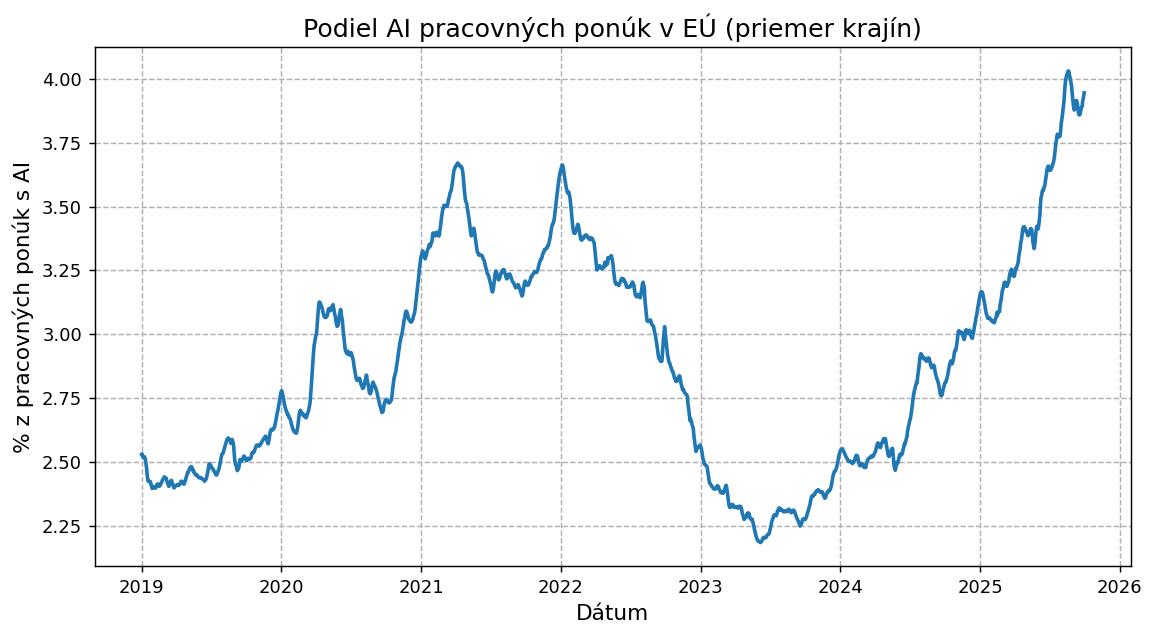

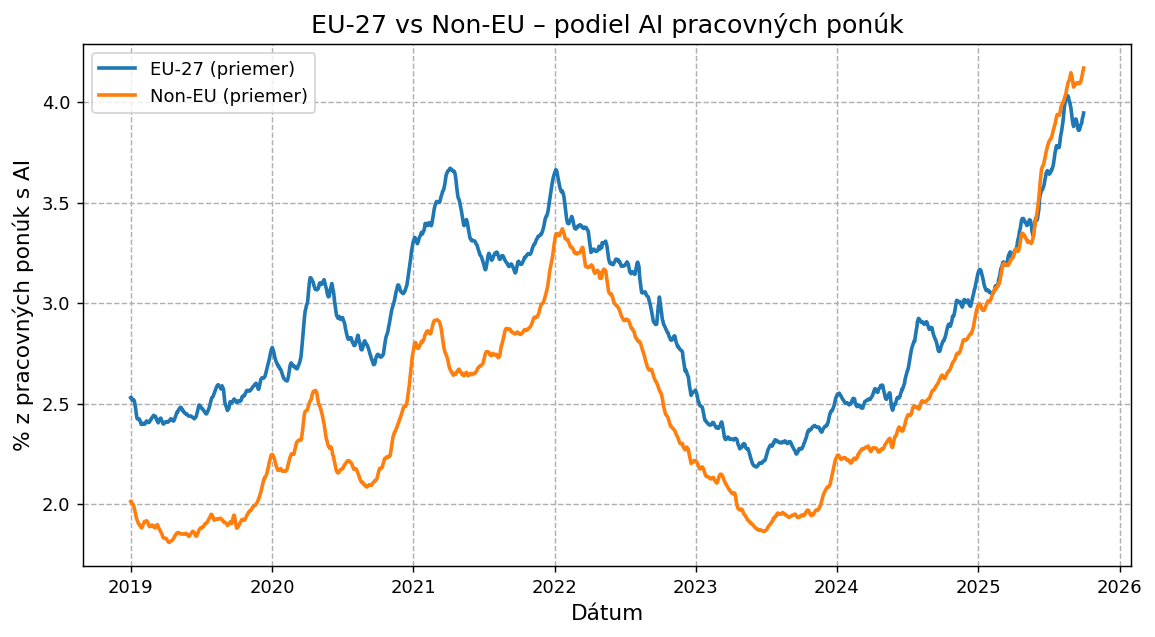

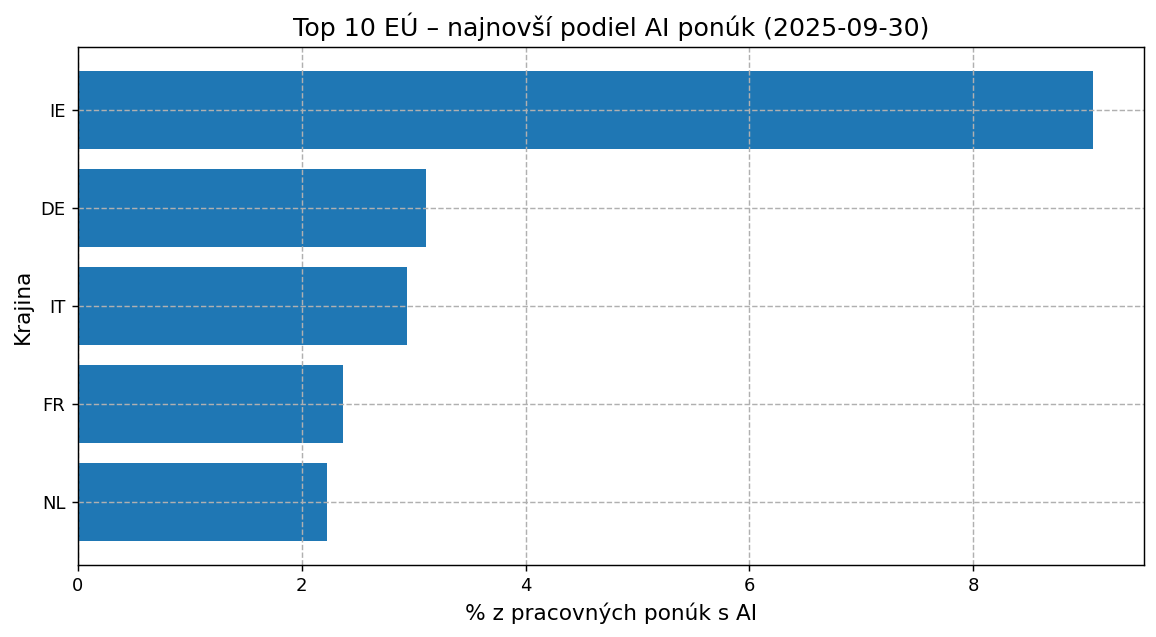

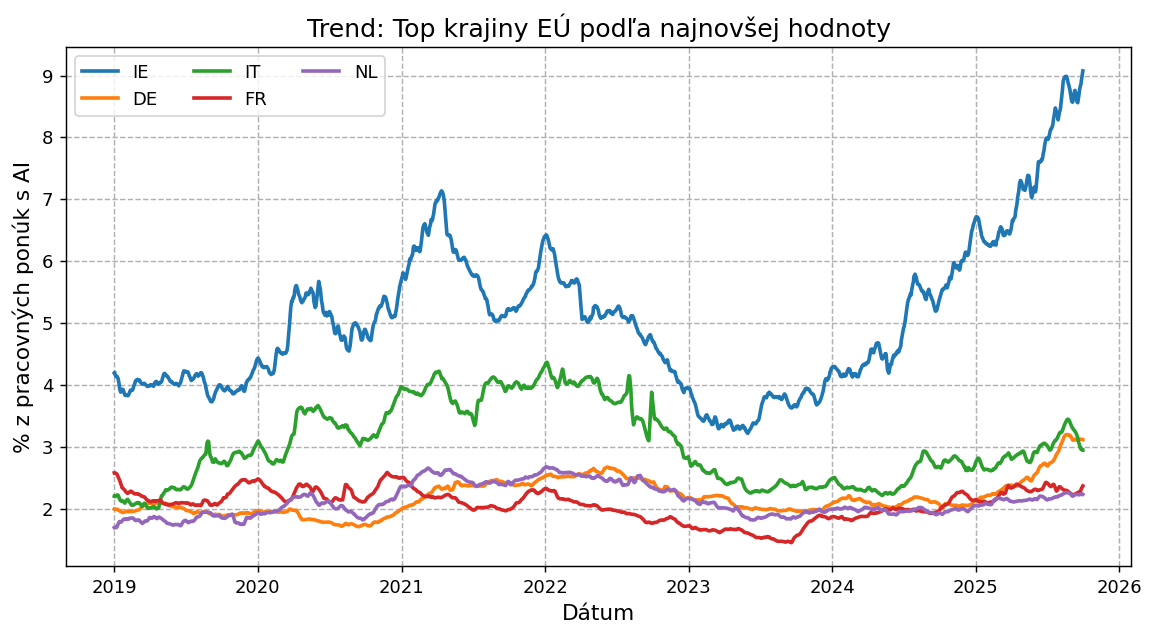

🎯 Hotovo: jednoduché grafy vykreslené a uložené ako PNG.
⬇️ Sťahujem: eu_mean_timeseries.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Sťahujem: eu_vs_noneu_timeseries.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Sťahujem: eu_latest_top10.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Sťahujem: eu_leaders_trends.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== SCRIPT K PREZENTÁCII =====

[4.1 EU-27 priemer v čase]

• Sledujeme priemerný podiel AI ponúk naprieč krajinami EÚ-27 v čase.
• Vidno celkový trend – či AI ponuky rastú, stagnujú alebo klesajú.
• Každý bod je priemer krajín v daný deň/mesiac, takže vyhladzuje extrémy jednotlivých krajín.


[4.2 EU vs Non-EU]

• Porovnanie priemeru EÚ-27 s priemerom krajín mimo EÚ.
• Ak je krivka EÚ nad Non-EU, EÚ má relatívne vyšší podiel AI ponúk (a naopak).
• Je to rýchly benchmark – kde sa EÚ nachádza voči svetu.


[4.3 Top 10 krajín EÚ (najnovší dátum)]

• Rebríček krajín EÚ podľa poslednej dostupnej hodnoty (2025-09-30).
• Jednoducho vidno „líderov“ a „doťahujúcich“ – kto má najvyšší aktuálny podiel AI ponúk.
• Horizontálne stĺpce uľahčujú čítanie názvov krajín.


[4.4 Trend lídrov]

• Na jednom grafe sú krivky pre 4–6 krajín s najvyššou poslednou hodnotou.
• Ukazuje, či sú lídri stabilní, alebo sa poradie dynamicky mení v čase.
• Vhodné na komentár k špecifickým krajinám – zlomové body, pr

In [2]:
# ai_posting_eu_simple_colab.py
# Jednoduché a čitateľné grafy pre AI_posting.csv (EU-27 + porovnanie s Non-EU)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True,
    "grid.linestyle": "--",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
    "figure.dpi": 130
})

RAW = "https://raw.githubusercontent.com/hiring-lab/ai-tracker/main/AI_posting.csv"

# EU-27 (bez UK). Pridávam EL aj GR pre istotu.
EU27 = {
    "AT","BE","BG","HR","CY","CZ","DK","EE","FI","FR","DE","EL","GR","IE","IT","LV","LT",
    "LU","MT","NL","PL","PT","RO","SK","SI","ES","SE","HU"
}

# 1) Načítanie (z webu, prípadne upload fallback)
try:
    df = pd.read_csv(RAW)
except Exception:
    from google.colab import files
    print("➡️ Nahraj AI_posting.csv")
    up = files.upload()
    df = pd.read_csv(list(up.keys())[0])

# 2) Čistenie
need = {"date","jobcountry","AI_share_postings"}
if not need.issubset(df.columns):
    raise ValueError(f"V CSV chýbajú stĺpce: {need}")

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["jobcountry"] = df["jobcountry"].astype(str).str.upper().str.strip()
df["AI_share_postings"] = pd.to_numeric(df["AI_share_postings"], errors="coerce")
df = df.dropna(subset=["date","jobcountry","AI_share_postings"]).sort_values("date")

# 3) EU vs Non-EU
df["is_eu"] = df["jobcountry"].isin(EU27)
last_date = df["date"].max()
print("🗓️ Posledný dátum v dátach:", last_date.date())

eu = df[df["is_eu"]]
non = df[~df["is_eu"]]

eu_mean = eu.groupby("date", as_index=False)["AI_share_postings"].mean().rename(columns={"AI_share_postings":"EU_mean"})
non_mean = non.groupby("date", as_index=False)["AI_share_postings"].mean().rename(columns={"AI_share_postings":"NonEU_mean"})

# -----------------------
# 4) GRAFY – jednoduché a čitateľné + ULOŽENIE PNG
# -----------------------

# 4.1 EU-27 priemer v čase (jedna čiara)
fig1 = plt.figure()
plt.plot(eu_mean["date"], eu_mean["EU_mean"], linewidth=2)
plt.title("Podiel AI pracovných ponúk v EÚ (priemer krajín)")
plt.xlabel("Dátum")
plt.ylabel("% z pracovných ponúk s AI")
plt.tight_layout()
fig1_path = "eu_mean_timeseries.png"
plt.savefig(fig1_path, bbox_inches="tight")
plt.show()

# 4.2 EU vs Non-EU (dve čiary, jasné porovnanie)
merged = pd.merge(eu_mean, non_mean, on="date", how="outer").sort_values("date")
fig2 = plt.figure()
plt.plot(merged["date"], merged["EU_mean"], linewidth=2, label="EU-27 (priemer)")
plt.plot(merged["date"], merged["NonEU_mean"], linewidth=2, label="Non-EU (priemer)")
plt.title("EU-27 vs Non-EU – podiel AI pracovných ponúk")
plt.xlabel("Dátum")
plt.ylabel("% z pracovných ponúk s AI")
plt.legend()
plt.tight_layout()
fig2_path = "eu_vs_noneu_timeseries.png"
plt.savefig(fig2_path, bbox_inches="tight")
plt.show()

# 4.3 Najnovšie hodnoty v EÚ – Top 10 (pre čitateľnosť)
latest_eu = (eu[eu["date"] == last_date]
             .groupby("jobcountry", as_index=False)["AI_share_postings"].mean()
             .sort_values("AI_share_postings", ascending=False)
             .head(10))
fig3 = plt.figure()
plt.barh(latest_eu["jobcountry"][::-1], latest_eu["AI_share_postings"][::-1])
plt.title(f"Top 10 EÚ – najnovší podiel AI ponúk ({last_date.date()})")
plt.xlabel("% z pracovných ponúk s AI")
plt.ylabel("Krajina")
plt.tight_layout()
fig3_path = "eu_latest_top10.png"
plt.savefig(fig3_path, bbox_inches="tight")
plt.show()

# 4.4 6 „líderov“ v EÚ – prehľad ich trendu (vyber podľa najnovšej hodnoty)
leaders = latest_eu["jobcountry"].tolist()[:6]
fig4 = plt.figure()
for cc in leaders:
    sub = eu[eu["jobcountry"] == cc]
    plt.plot(sub["date"], sub["AI_share_postings"], linewidth=2, label=cc)
plt.title("Trend: Top krajiny EÚ podľa najnovšej hodnoty")
plt.xlabel("Dátum")
plt.ylabel("% z pracovných ponúk s AI")
plt.legend(ncol=3)
plt.tight_layout()
fig4_path = "eu_leaders_trends.png"
plt.savefig(fig4_path, bbox_inches="tight")
plt.show()

print("🎯 Hotovo: jednoduché grafy vykreslené a uložené ako PNG.")

# -----------------------
# 5) Automatické stiahnutie PNG v Colabe (ak bežíš v Colabe)
# -----------------------
try:
    from google.colab import files  # type: ignore
    for f in [fig1_path, fig2_path, fig3_path, fig4_path]:
        print(f"⬇️ Sťahujem: {f}")
        files.download(f)
except Exception:
    print("ℹ️ Nie si v Colabe – súbory máš uložené lokálne:",
          [fig1_path, fig2_path, fig3_path, fig4_path])

# -----------------------
# 6) SCRIPT: čo povedať pri každom grafe (stručne vytlačí do konzoly)
# -----------------------
SCRIPT = {
"4.1 EU-27 priemer v čase": """
• Sledujeme priemerný podiel AI ponúk naprieč krajinami EÚ-27 v čase.
• Vidno celkový trend – či AI ponuky rastú, stagnujú alebo klesajú.
• Každý bod je priemer krajín v daný deň/mesiac, takže vyhladzuje extrémy jednotlivých krajín.
""",
"4.2 EU vs Non-EU": """
• Porovnanie priemeru EÚ-27 s priemerom krajín mimo EÚ.
• Ak je krivka EÚ nad Non-EU, EÚ má relatívne vyšší podiel AI ponúk (a naopak).
• Je to rýchly benchmark – kde sa EÚ nachádza voči svetu.
""",
"4.3 Top 10 krajín EÚ (najnovší dátum)": f"""
• Rebríček krajín EÚ podľa poslednej dostupnej hodnoty ({last_date.date()}).
• Jednoducho vidno „líderov“ a „doťahujúcich“ – kto má najvyšší aktuálny podiel AI ponúk.
• Horizontálne stĺpce uľahčujú čítanie názvov krajín.
""",
"4.4 Trend lídrov": """
• Na jednom grafe sú krivky pre 4–6 krajín s najvyššou poslednou hodnotou.
• Ukazuje, či sú lídri stabilní, alebo sa poradie dynamicky mení v čase.
• Vhodné na komentár k špecifickým krajinám – zlomové body, prípadné skoky.
"""
}

print("\n===== SCRIPT K PREZENTÁCII =====")
for title, text in SCRIPT.items():
    print(f"\n[{title}]\n{text}")


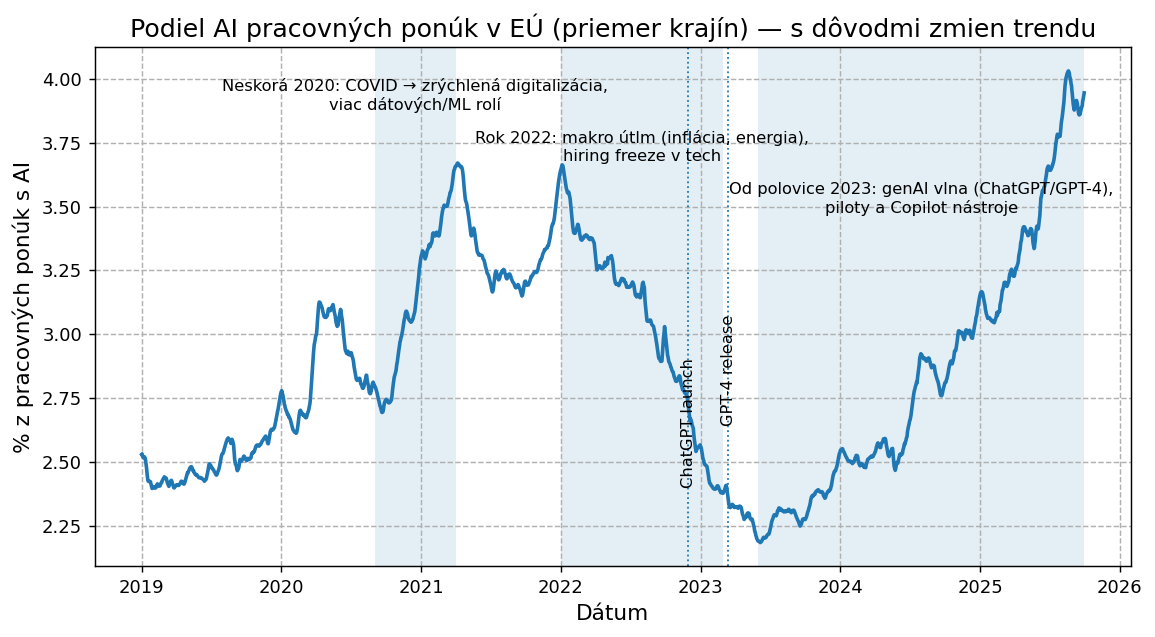

✅ Vygenerované: eu_mean_timeseries_explained.png


In [10]:
# 4.1c EU-27 priemer v čase + prečo sa menil trend (vyznačené obdobia + míľniky)

import pandas as pd
import matplotlib.pyplot as plt

# pracujeme s už pripraveným eu_mean (stĺpce: date, EU_mean)
fig = plt.figure()
ax = plt.gca()
ax.plot(eu_mean["date"], eu_mean["EU_mean"], linewidth=2)
ax.set_title("Podiel AI pracovných ponúk v EÚ (priemer krajín) — s dôvodmi zmien trendu")
ax.set_xlabel("Dátum")
ax.set_ylabel("% z pracovných ponúk s AI")

# --- 3 kľúčové obdobia (priehľadné pásy) ---
# 1) Neskorá 2020 – nábeh digitalizácie po prvej vlne COVID
# 2) Rok 2022 – makro spomalenie (inflácia, energia), hiring freeze v tech
# 3) Od polovice 2023 – genAI vlna (ChatGPT/GPT-4) → projekty, piloty, Copilot nástroje
periods = [
    ("2020-09-01", "2021-04-01",
     "Neskorá 2020: COVID → zrýchlená digitalizácia,\nviac dátových/ML rolí"),
    ("2022-01-01", "2023-03-01",
     "Rok 2022: makro útlm (inflácia, energia),\nhiring freeze v tech"),
    ("2023-06-01", None,
     "Od polovice 2023: genAI vlna (ChatGPT/GPT-4),\npiloty a Copilot nástroje")
]

xmin = eu_mean["date"].min()
xmax = eu_mean["date"].max()
ymin, ymax = ax.get_ylim()
yr = ymax - ymin

for i, (s_str, e_str, label) in enumerate(periods):
    s = pd.to_datetime(s_str)
    e = pd.to_datetime(e_str) if e_str else xmax
    # ohranič na dostupný rozsah dát
    s = max(s, xmin); e = min(e, xmax)
    # pás
    ax.axvspan(s, e, alpha=0.12)
    # popis do stredu pásu (kaskádovito, aby sa neprekrývali)
    xmid = s + (e - s) / 2
    y = ymax - (0.06 + 0.10*(i % 3)) * yr
    ax.text(xmid, y, label, ha="center", va="top", fontsize=9)

# --- Dôležité míľniky genAI (vertikálne čiary) ---
milestones = [
    ("2022-11-30", "ChatGPT launch"),
    ("2023-03-14", "GPT-4 release"),
]
for j, (d_str, label) in enumerate(milestones):
    d = pd.to_datetime(d_str)
    if xmin <= d <= xmax:
        ax.axvline(d, linewidth=1, linestyle=":")
        y = ymin + (0.15 + 0.12*j) * yr
        ax.text(d, y, label, rotation=90, va="bottom", ha="center", fontsize=9)

plt.tight_layout()
annot_path2 = "eu_mean_timeseries_explained.png"
plt.savefig(annot_path2, bbox_inches="tight")
plt.show()
print("✅ Vygenerované:", annot_path2)
